In [1]:
import os

from unstructured_inference.inference.layout import process_file_with_model
from unstructured_inference.visualize import show_plot

In [2]:
annotation_data_map = {
    "final": None,
    "extracted": {"layout": {"color": "green", "width": 2}},
    "inferred": {"inferred_layout": {"color": "blue", "width": 2}},
    "ocr": {"ocr_layout": {"color": "yellow", "width": 2}},
}

In [3]:
f_path = "../../sample-docs/loremipsum.pdf"
f_name = os.path.basename(f_path)

In [4]:
doc = process_file_with_model(
    f_path,
    model_name=None,
    analysis=True,
)

/Users/christinestraub/.pyenv/versions/3.8.15/envs/unstructured-inference/lib/python3.8/site-packages/onnxruntime/capi/onnxruntime_inference_collection.py:65: UserWarning: Specified provider 'TensorrtExecutionProvider' is not in available provider names.Available providers: 'CPUExecutionProvider'
  warnings.warn(
/Users/christinestraub/.pyenv/versions/3.8.15/envs/unstructured-inference/lib/python3.8/site-packages/onnxruntime/capi/onnxruntime_inference_collection.py:65: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'CPUExecutionProvider'
  warnings.warn(


Filename: loremipsum.pdf - Page: 1 - Layout: final - n_layout_elements: 6


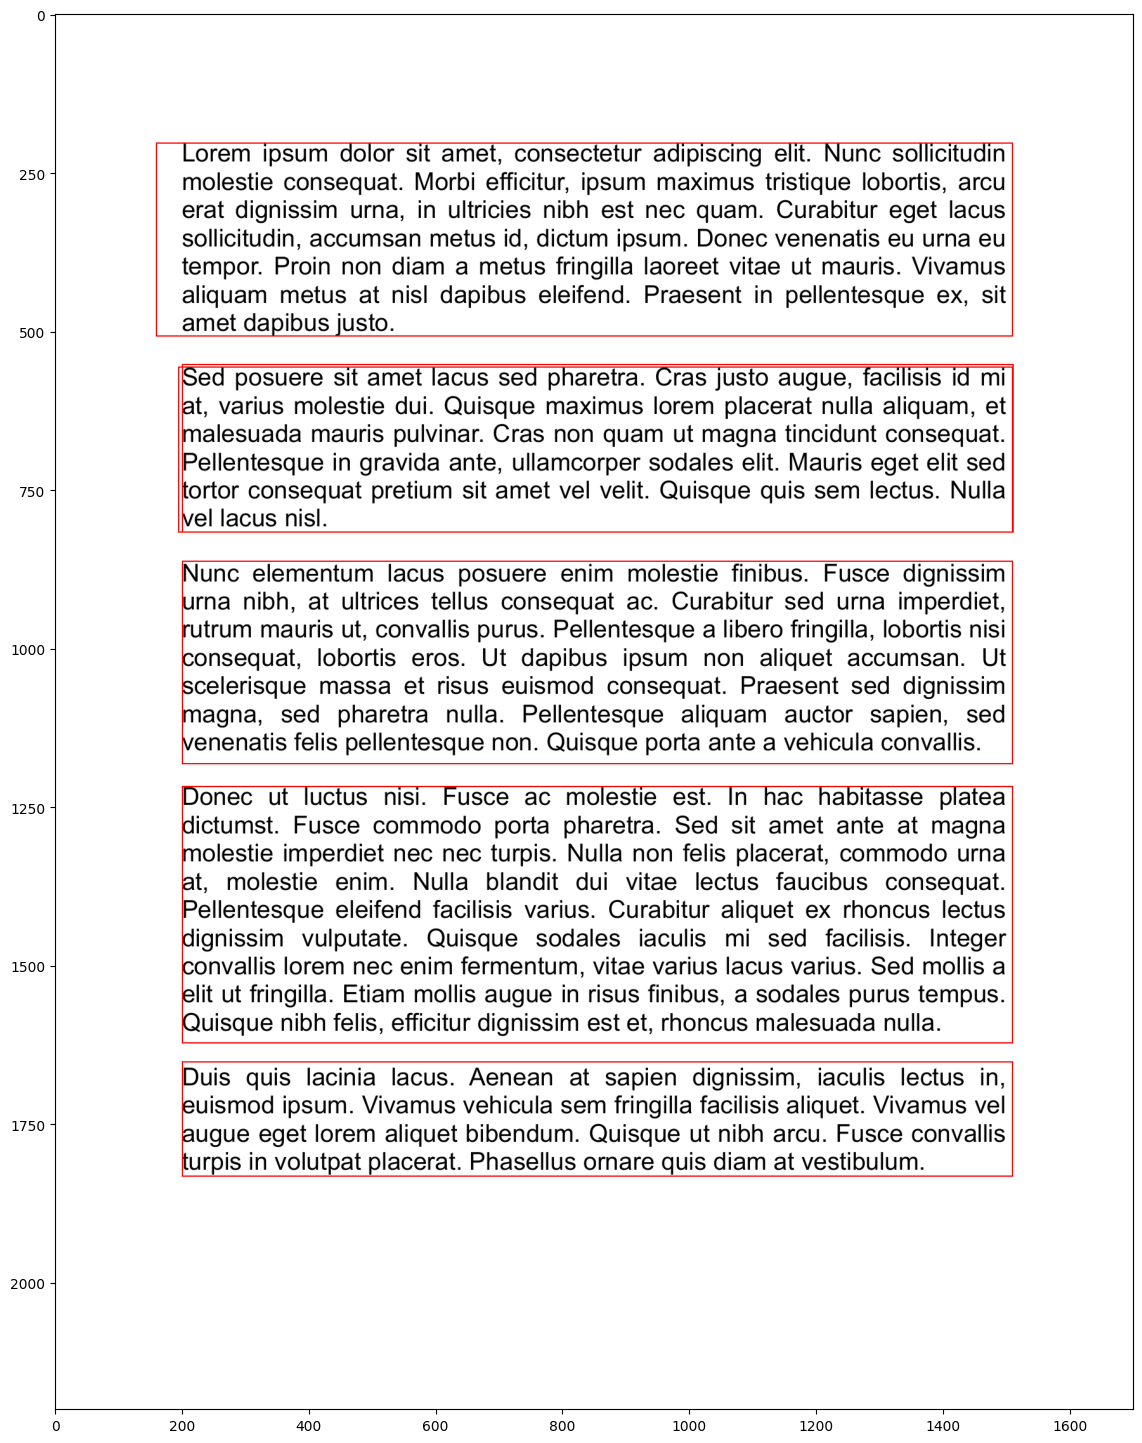

Filename: loremipsum.pdf - Page: 1 - Layout: extracted - n_layout_elements: 39


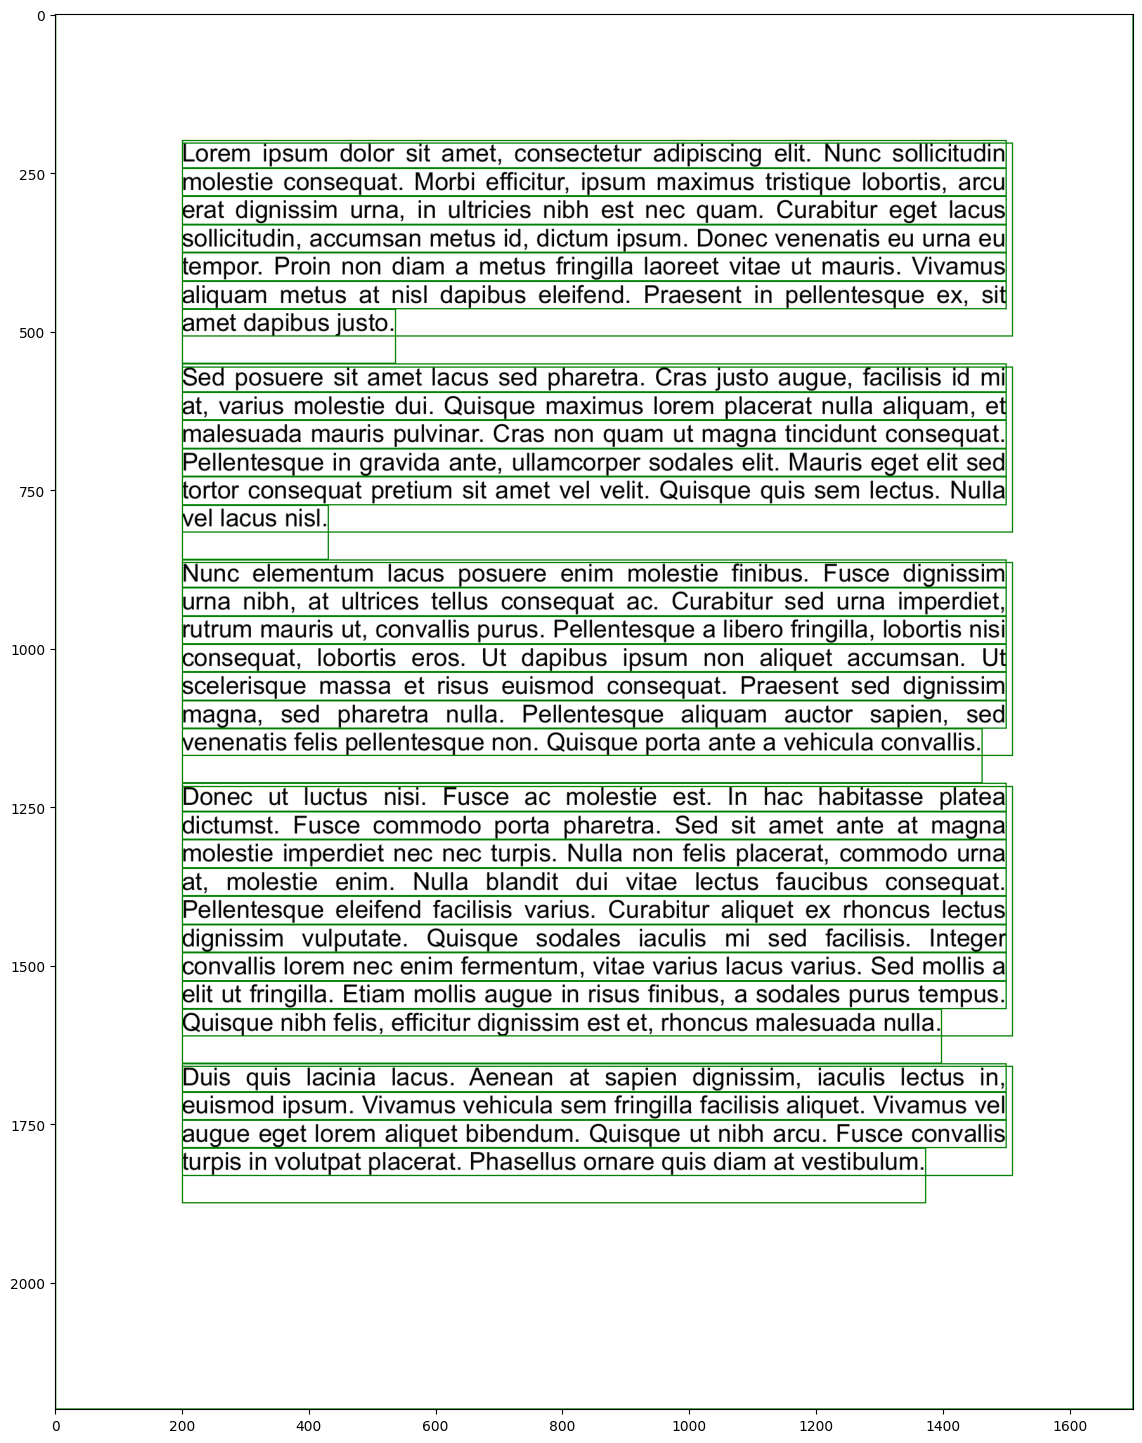

Filename: loremipsum.pdf - Page: 1 - Layout: inferred - n_layout_elements: 6


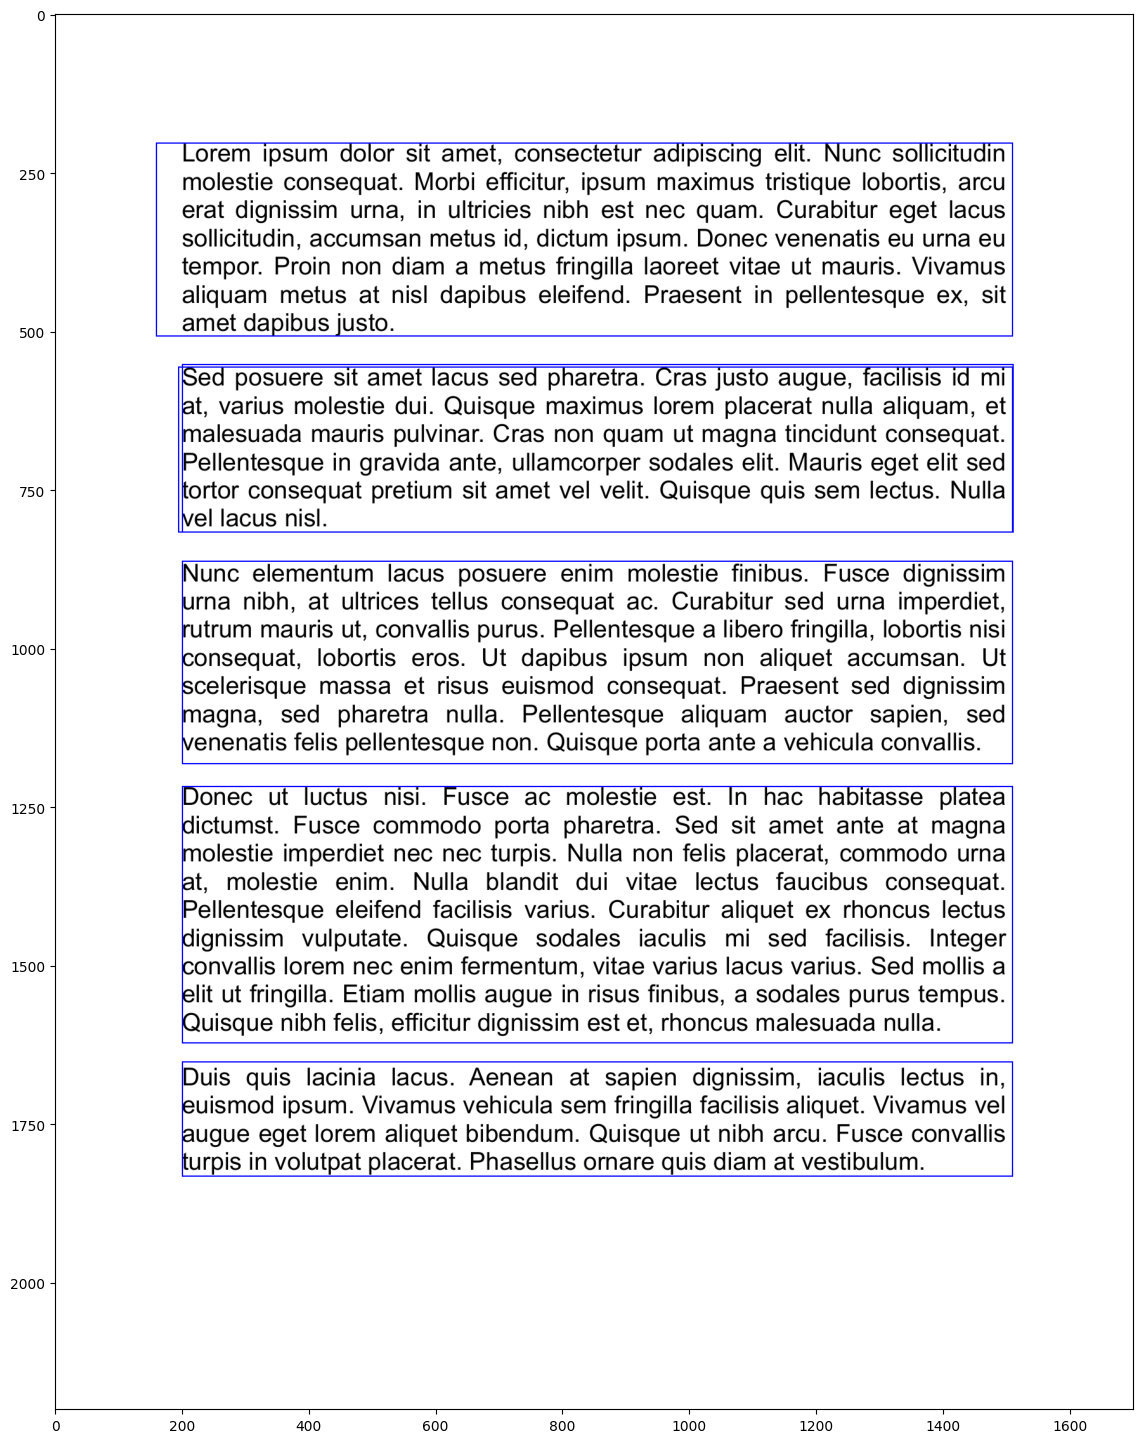

Filename: loremipsum.pdf - Page: 1 - Layout: ocr - n_layout_elements: 336


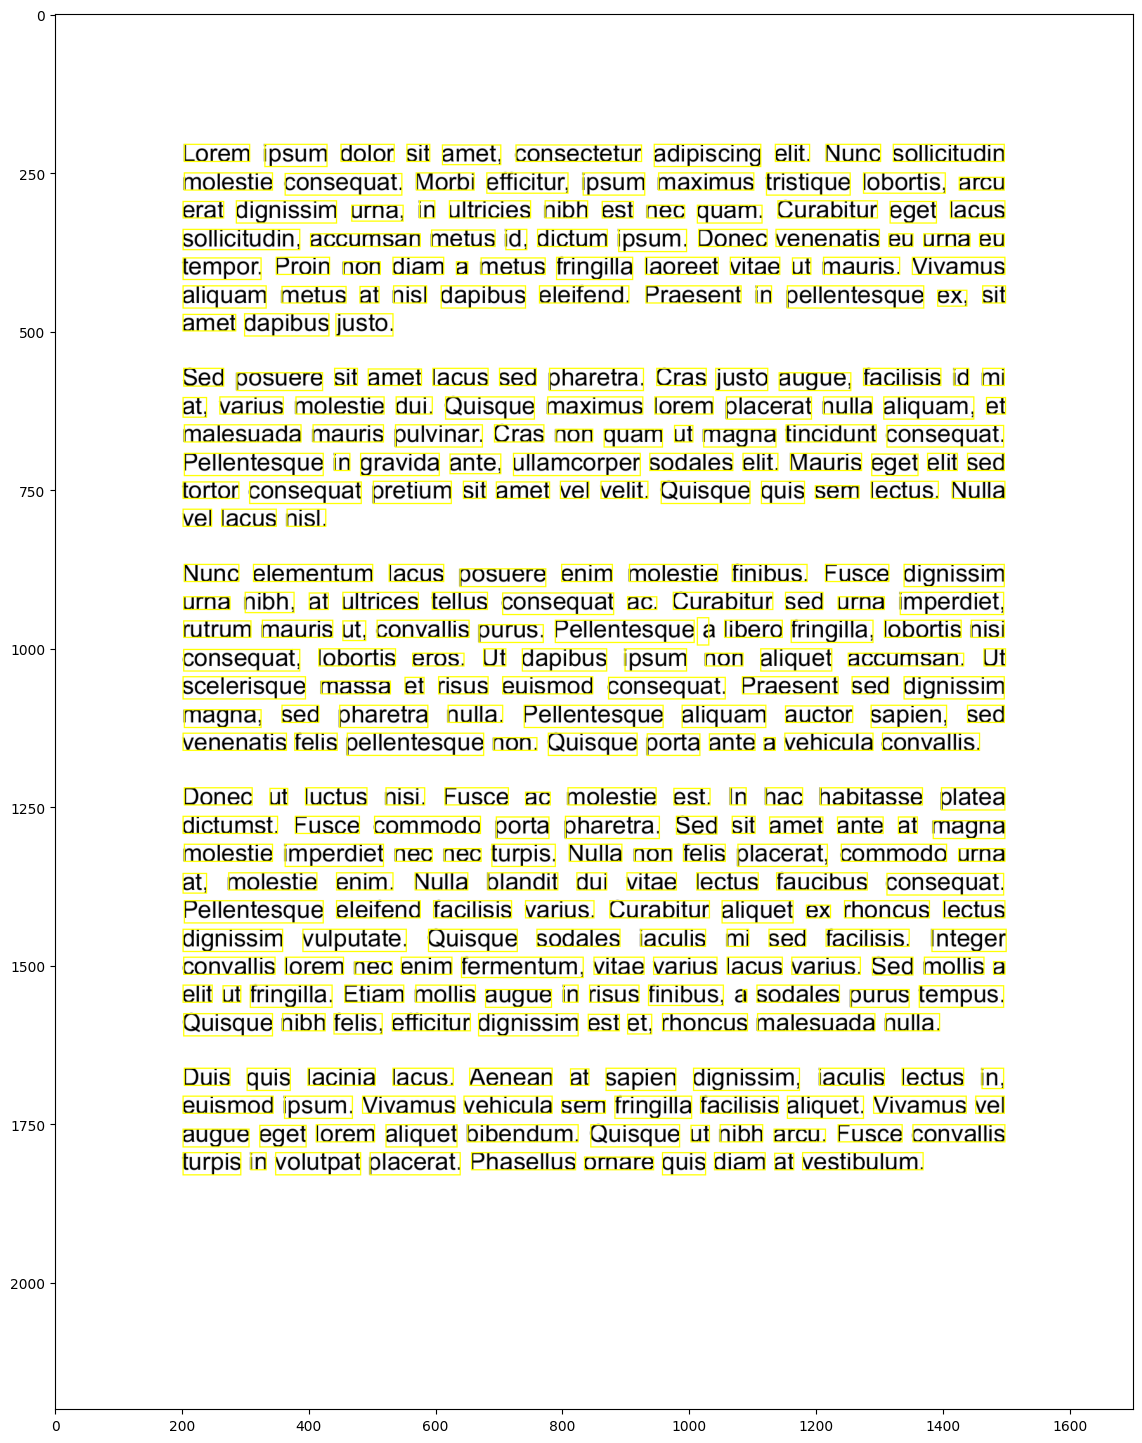

In [5]:
for idx, page in enumerate(doc.pages):
    for action_type, action_value in annotation_data_map.items():
        img = page.annotate(annotation_data=action_value)
        if action_value is None:
            n_layout_elements = len(page.elements)
        else:
            attribute = list(action_value.keys())[0]
            n_layout_elements = len(getattr(page, attribute))
        print(f"Filename: {f_name} - Page: {idx+1} - Layout: {action_type} - n_layout_elements: {n_layout_elements}")
        show_plot(img, desired_width=14)